<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открытие-файла-и-изучение-данных" data-toc-modified-id="Открытие-файла-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие файла и изучение данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Создание-обучающей,-валидационной-и-тестовой-выборок" data-toc-modified-id="Создание-обучающей,-валидационной-и-тестовой-выборок-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Создание обучающей, валидационной и тестовой выборок</a></span></li><li><span><a href="#Выводы-по-п.-1" data-toc-modified-id="Выводы-по-п.-1-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выводы по п. 1</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Модель-решающего-дерева" data-toc-modified-id="Модель-решающего-дерева-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель решающего дерева</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Сравнение-моделей-разного-типа" data-toc-modified-id="Сравнение-моделей-разного-типа-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Сравнение моделей разного типа</a></span></li><li><span><a href="#Выводы-по-п.-2" data-toc-modified-id="Выводы-по-п.-2-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выводы по п. 2</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Модель-решающего-дерева" data-toc-modified-id="Модель-решающего-дерева-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель решающего дерева</a></span><ul class="toc-item"><li><span><a href="#Метод-class_weight" data-toc-modified-id="Метод-class_weight-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Метод class_weight</a></span></li><li><span><a href="#Метод-upsampling" data-toc-modified-id="Метод-upsampling-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Метод upsampling</a></span></li></ul></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель случайного леса</a></span><ul class="toc-item"><li><span><a href="#Метод-class_weight" data-toc-modified-id="Метод-class_weight-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Метод class_weight</a></span></li><li><span><a href="#Метод-upsampling" data-toc-modified-id="Метод-upsampling-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Метод upsampling</a></span></li></ul></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span><ul class="toc-item"><li><span><a href="#Метод-class_weight" data-toc-modified-id="Метод-class_weight-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Метод class_weight</a></span></li><li><span><a href="#Метод-upsampling" data-toc-modified-id="Метод-upsampling-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Метод upsampling</a></span></li></ul></li><li><span><a href="#Сравнение-моделей-разного-типа" data-toc-modified-id="Сравнение-моделей-разного-типа-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Сравнение моделей разного типа</a></span></li><li><span><a href="#Дообучение-модели-с-наилучшими-гиперпараметрами" data-toc-modified-id="Дообучение-модели-с-наилучшими-гиперпараметрами-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Дообучение модели с наилучшими гиперпараметрами</a></span></li><li><span><a href="#Выводы-по-п.-3" data-toc-modified-id="Выводы-по-п.-3-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Выводы по п. 3</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-п.-4" data-toc-modified-id="Выводы-по-п.-4-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы по п. 4</a></span></li></ul></li><li><span><a href="#Выводы-по-проекту" data-toc-modified-id="Выводы-по-проекту-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы по проекту</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование: Отток клиентов

**Задача:** Спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 

**Данные:** Исторические данные о поведении клиентов и расторжении договоров с банком. Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Цель:** Построить модель с предельно большим значением *F1*-меры. Довести метрику до 0.59. Проверить *F1*-меру на тестовой выборке, дополнительно измерить *AUC-ROC*, сравнить её значение с *F1*-мерой.

## Подготовка данных

### Открытие файла и изучение данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
try:
    df = pd.read_csv('/datasets/Churn.csv') # server path
except:
    df = pd.read_csv('C:/Users/datasets/Churn.csv') # local path

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Описание данных**

Признаки:
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак:
- Exited — факт ухода клиента

In [3]:
df.head(n=5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Датафрейм содержит 10000 записей. 

Есть пропуски в столбце 'Tenure'. Кроме того, данные в нем, вероятно, следует преобразовать в целочисленный тип.

Данные в столбцах 'RowNumber', 'CustomerId' и 'Surname' не связаны с целевым признаком и, вероятно, будут мешать проведению обучения.

Имеются столбцы с категориальными признаками:
- Geography — страна проживания;
- Gender — пол.

### Подготовка признаков

In [4]:
df['Tenure'].isna().sum()

909

In [5]:
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

<AxesSubplot:>

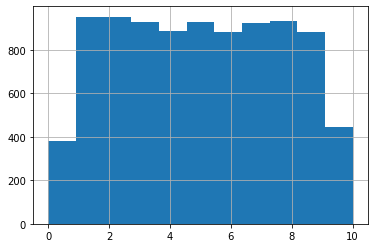

In [6]:
df['Tenure'].hist(bins=11)

В столбце 'Tenure' 909 пропущенных значений, при этом необычно мало значений, равных 0. Скорее всего, пропущенные значения соответствуют нулям.

Все не пропущенные значения являются целочисленными.

In [7]:
df['Tenure'] = df['Tenure'].fillna(0).astype('int')

Проведено заполнение нулями пропущенных значений в столбце 'Tenure' и замена его типа на целочисленный.

In [8]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Из данных удалены неинформативные признаки, которые могут помешать проведению обучения:
- RowNumber — индекс строки в данных;
- CustomerId — уникальный идентификатор клиента;
- Surname — фамилия.

In [9]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Выполнено One-Hot Encoding категориальных признаков:
- Geography — страна проживания;
- Gender — пол.

### Создание обучающей, валидационной и тестовой выборок

In [10]:
features = df.drop(['Exited'], axis=1)
target = df['Exited']

features_train_valid, features_test, target_train_valid, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_valid, target_train_valid, test_size=0.25, random_state=12345)

print("features_train.shape:", features_train.shape)
print("features_valid.shape:", features_valid.shape)
print("features_test.shape:", features_test.shape)

features_train.shape: (6000, 11)
features_valid.shape: (2000, 11)
features_test.shape: (2000, 11)


Данные разделены на целевые признаки (факт ухода клиента) и признаки (все остальное). 

Выборка случайным образом разделена на
- обучающую (60% - 6000 записей);
- валидационную (20% - 2000 записей);
- тестовую (20% - 2000 записей).

### Выводы по п. 1

Загружен файл с данными о 10 000 клиентах банка. 

Пропуски в столбце Tenure заполнены нулями, его тип заменен на целочисленный.

Из данных удалены неинформативные признаки, которые могут помешать проведению обучения: RowNumber, CustomerId, Surname.

Выполнено One-Hot Encoding категориальных признаков Geography, Gender.

Данные разделены на целевые признаки (факт ухода клиента) и признаки (все остальное). 

Выборка случайным образом разделена на обучающую (60%), валидационную (20%), тестовую (20%).

## Исследование задачи

In [11]:
best_models = []
best_results = []
best_auc_rocs = []

Подготовлены списки для сохранения лучших моделей каждого типа.

### Модель решающего дерева

In [12]:
best_model = None
best_result = 0
best_auc_roc = 0
best_depth = None

for depth in range(1, 31):
    
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучение модели с заданной глубиной дерева
    model.fit(features_train, target_train) # обучение модели
    predicted_valid = model.predict(features_valid) # получение предсказания модели
    result = f1_score(target_valid, predicted_valid) # подсчет качества модели на валидационной выборке
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    
    if result > best_result:
        best_model = model # сохранение наилучшей модели
        best_result = result # сохранение наилучшего значения F1-меры на валидационных данных
        best_auc_roc = auc_roc # сохранение значения ROC AUC наилучшей модели
        best_depth = depth # сохранение параметра max_depth наилучшей модели
        
best_models.append(best_model)
best_results.append(best_result)
best_auc_rocs.append(best_auc_roc)

print("F1-мера лучшей модели решающего дерева на валидационной выборке:", best_result)
print("ROC AUC мера лучшей модели решающего дерева на валидационной выборке:", best_auc_roc)
print("Глубина лучшей модели решающего дерева:", best_depth)

F1-мера лучшей модели решающего дерева на валидационной выборке: 0.5488958990536277
ROC AUC мера лучшей модели решающего дерева на валидационной выборке: 0.8275652142122556
Глубина лучшей модели решающего дерева: 7


### Модель случайного леса

In [13]:
best_model = None
best_result = 0
best_auc_roc = 0
best_depth = None
best_est = None

for est in range(10, 101, 10):
    for depth in range(1, 31):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) # обучение модели с заданным количеством деревьев
        model.fit(features_train, target_train) # обучение модели на тренировочной выборке
        predicted_valid = model.predict(features_valid) # получение предсказания модели
        result = f1_score(target_valid, predicted_valid) # подсчет качества модели на валидационной выборке
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        
        if result > best_result:
            best_model = model # сохранение наилучшей модели
            best_result = result # сохранение наилучшего значения F1-меры на валидационных данных
            best_auc_roc = auc_roc # сохранение значения ROC AUC наилучшей модели
            best_est = est # сохранение параметра n_estimators наилучшей модели
            best_depth = depth # сохранение параметра max_depth наилучшей модели
        
best_models.append(best_model)
best_results.append(best_result)
best_auc_rocs.append(best_auc_roc)

print("F1-мера наилучшей модели случайного леса на валидационной выборке:", best_result)
print("ROC AUC мера лучшей модели случайного леса на валидационной выборке:", best_auc_roc)
print("Число деревьев лучшей модели случайного леса:", best_est)
print("Глубина деревьев лучшей модели случайного леса:", best_depth)

F1-мера наилучшей модели случайного леса на валидационной выборке: 0.5736925515055468
ROC AUC мера лучшей модели случайного леса на валидационной выборке: 0.8405786504619953
Число деревьев лучшей модели случайного леса: 40
Глубина деревьев лучшей модели случайного леса: 23


### Логистическая регрессия

In [14]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train) # обучение модели на тренировочной выборке
predicted_valid = model.predict(features_valid) # получение предсказания модели
result = f1_score(target_valid, predicted_valid) # F1-мера качества модели на валидационной выборке
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

best_models.append(model)
best_results.append(result)
best_auc_rocs.append(auc_roc)

print("F1-мера модели логистической регрессии на валидационной выборке:", result)
print("ROC AUC мера модели логистической регрессии на валидационной выборке:", auc_roc)

F1-мера модели логистической регрессии на валидационной выборке: 0.10290827740492169
ROC AUC мера модели логистической регрессии на валидационной выборке: 0.6812399561927076


### Сравнение моделей разного типа

In [15]:
very_best_result = max(best_results)
very_best_model = best_models[best_results.index(very_best_result)]
very_best_auc_roc = best_auc_rocs[best_results.index(very_best_result)]
print('Наилучшая из опробованных моделей:', very_best_model, 
      '\nее F1-мера -', very_best_result, 
      '\nее ROC AUC мера -', very_best_auc_roc)

Наилучшая из опробованных моделей: RandomForestClassifier(max_depth=23, n_estimators=40, random_state=12345) 
ее F1-мера - 0.5736925515055468 
ее ROC AUC мера - 0.8405786504619953


### Выводы по п. 2

Были обучены 3 типа моделей с различными гиперпараметрами
- решающее дерево глубиной от 1 до 30;
- модель случайного леса с числом оценщиков от 10 до 100 с шагом 10 и максимальной глубиной 30;
- модель логистической регрессии.

Наилучшее значение F1-меры на валидационной выборке дала модель случайного леса с 40 деревьями и максимальной глубиной 23. Ее F1-score = 0.5737, ROC AUC мера - 0.8406. Целевое значение F1-меры 0.59 не достигнуто.

## Борьба с дисбалансом

In [16]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Имеется дисбаланс в данных - в целевом столбце единица встречается в 4 раза реже, чем 0.

In [17]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Решено сравнить методы upsample и class_weight. Проведен upsampling данных.

In [18]:
best_models = []
best_results = []
best_auc_rocs = []

### Модель решающего дерева

#### Метод class_weight

In [19]:
best_model = None
best_result = 0
best_auc_roc = 0
best_depth = None

for depth in range(1, 31):
    
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') # обучение модели с заданной глубиной дерева
    model.fit(features_train, target_train) # обучение модели
    predicted_valid = model.predict(features_valid) # получение предсказания модели
    result = f1_score(target_valid, predicted_valid) # подсчет качества модели на валидационной выборке
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    
    if result > best_result:
        best_model = model # сохранение наилучшей модели
        best_result = result # сохранение наилучшего значения F1-меры на валидационных данных
        best_auc_roc = auc_roc # сохранение значения ROC AUC наилучшей модели
        best_depth = depth # сохранение параметра max_depth наилучшей модели
        
best_models.append(best_model)
best_results.append(best_result)
best_auc_rocs.append(best_auc_roc)

print("F1-мера лучшей модели решающего дерева на валидационной выборке:", best_result)
print("ROC AUC мера лучшей модели решающего дерева на валидационной выборке:", best_auc_roc)
print("Глубина лучшей модели решающего дерева:", best_depth)

F1-мера лучшей модели решающего дерева на валидационной выборке: 0.5587044534412956
ROC AUC мера лучшей модели решающего дерева на валидационной выборке: 0.8089018134883863
Глубина лучшей модели решающего дерева: 6


#### Метод upsampling

In [20]:
best_model = None
best_result = 0
best_auc_roc = 0
best_depth = None

for depth in range(1, 31):
    
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучение модели с заданной глубиной дерева
    model.fit(features_upsampled, target_upsampled) # обучение модели
    predicted_valid = model.predict(features_valid) # получение предсказания модели
    result = f1_score(target_valid, predicted_valid) # подсчет качества модели на валидационной выборке
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    
    if result > best_result:
        best_model = model # сохранение наилучшей модели
        best_result = result # сохранение наилучшего значения F1-меры на валидационных данных
        best_auc_roc = auc_roc # сохранение значения ROC AUC наилучшей модели
        best_depth = depth # сохранение параметра max_depth наилучшей модели
        
best_models.append(best_model)
best_results.append(best_result)
best_auc_rocs.append(best_auc_roc)

print("F1-мера лучшей модели решающего дерева на валидационной выборке:", best_result)
print("ROC AUC мера лучшей модели решающего дерева на валидационной выборке:", best_auc_roc)
print("Глубина лучшей модели решающего дерева:", best_depth)

F1-мера лучшей модели решающего дерева на валидационной выборке: 0.5587044534412956
ROC AUC мера лучшей модели решающего дерева на валидационной выборке: 0.8088890972931989
Глубина лучшей модели решающего дерева: 6


In [21]:
model1 = DecisionTreeClassifier(random_state=12345, max_depth=6, class_weight='balanced') # обучение модели с заданной глубиной дерева
model1.fit(features_train, target_train) # обучение модели
predicted_valid1 = model1.predict(features_valid) # получение предсказания модели

model2 = DecisionTreeClassifier(random_state=12345, max_depth=6) # обучение модели с заданной глубиной дерева
model2.fit(features_upsampled, target_upsampled) # обучение модели
predicted_valid2 = model2.predict(features_valid) # получение предсказания модели

np.abs(predicted_valid2 - predicted_valid1).sum()

0

### Модель случайного леса

#### Метод class_weight

In [22]:
best_model = None
best_result = 0
best_auc_roc = 0
best_depth = None
best_est = None

for est in range(10, 101, 10):
    for depth in range(1, 31):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced') # обучение модели с заданным количеством деревьев
        model.fit(features_train, target_train) # обучение модели на тренировочной выборке
        predicted_valid = model.predict(features_valid) # получение предсказания модели
        result = f1_score(target_valid, predicted_valid) # подсчет качества модели на валидационной выборке
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        
        if result > best_result:
            best_model = model # сохранение наилучшей модели
            best_result = result # сохранение наилучшего значения F1-меры на валидационных данных
            best_auc_roc = auc_roc # сохранение значения ROC AUC наилучшей модели
            best_est = est # сохранение параметра n_estimators наилучшей модели
            best_depth = depth # сохранение параметра max_depth наилучшей модели
        
best_models.append(best_model)
best_results.append(best_result)
best_auc_rocs.append(best_auc_roc)

print("F1-мера наилучшей модели случайного леса на валидационной выборке:", best_result)
print("ROC AUC мера лучшей модели случайного леса на валидационной выборке:", best_auc_roc)
print("Число деревьев лучшей модели случайного леса:", best_est)
print("Глубина деревьев лучшей модели случайного леса:", best_depth)

F1-мера наилучшей модели случайного леса на валидационной выборке: 0.6045918367346939
ROC AUC мера лучшей модели случайного леса на валидационной выборке: 0.8514684821154662
Число деревьев лучшей модели случайного леса: 90
Глубина деревьев лучшей модели случайного леса: 10


#### Метод upsampling

In [23]:
best_model = None
best_result = 0
best_auc_roc = 0
best_depth = None
best_est = None

for est in range(10, 101, 10):
    for depth in range(1, 31):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) # обучение модели с заданным количеством деревьев
        model.fit(features_upsampled, target_upsampled) # обучение модели на тренировочной выборке
        predicted_valid = model.predict(features_valid) # получение предсказания модели
        result = f1_score(target_valid, predicted_valid) # подсчет качества модели на валидационной выборке
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

        if result > best_result:
            best_model = model # сохранение наилучшей модели
            best_result = result # сохранение наилучшего значения F1-меры на валидационных данных
            best_auc_roc = auc_roc # сохранение значения ROC AUC наилучшей модели
            best_est = est # сохранение параметра n_estimators наилучшей модели
            best_depth = depth # сохранение параметра max_depth наилучшей модели
            
best_models.append(best_model)
best_results.append(best_result)
best_auc_rocs.append(best_auc_roc)

print("F1-мера наилучшей модели случайного леса на валидационной выборке:", best_result)
print("ROC AUC мера лучшей модели случайного леса на валидационной выборке:", best_auc_roc)
print("Число деревьев лучшей модели случайного леса:", best_est)
print("Глубина деревьев лучшей модели случайного леса:", best_depth)

F1-мера наилучшей модели случайного леса на валидационной выборке: 0.6040268456375838
ROC AUC мера лучшей модели случайного леса на валидационной выборке: 0.8433452176774187
Число деревьев лучшей модели случайного леса: 60
Глубина деревьев лучшей модели случайного леса: 15


### Логистическая регрессия

#### Метод class_weight

In [24]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

best_models.append(model)
best_results.append(result)
best_auc_rocs.append(auc_roc)

print("F1:", result)
print("ROC AUC:", auc_roc)

F1: 0.4754521963824289
ROC AUC: 0.7707587912620666


#### Метод upsampling

In [25]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

best_models.append(model)
best_results.append(result)
best_auc_rocs.append(auc_roc)

print("F1:", result)
print("ROC AUC:", auc_roc)

F1: 0.43423137876386686
ROC AUC: 0.7170344561203842


### Сравнение моделей разного типа

У модели решающего дерева методы upsample и class_weight дали одинаковые значения F1-меры. У моделей случайного леса и логистической регрессии лучшие значения F1-меры были получены при использовании метода class_weight.

In [26]:
very_best_result = max(best_results)
very_best_model = best_models[best_results.index(very_best_result)]
very_best_auc_roc = best_auc_rocs[best_results.index(very_best_result)]
print('Наилучшая из опробованных моделей:', very_best_model, 
      '\nее F1-мера -', very_best_result, 
      '\nее ROC AUC мера -', very_best_auc_roc)

Наилучшая из опробованных моделей: RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=90,
                       random_state=12345) 
ее F1-мера - 0.6045918367346939 
ее ROC AUC мера - 0.8514684821154662


### Дообучение модели с наилучшими гиперпараметрами

In [27]:
very_best_model.fit(features_train_valid, target_train_valid)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=90,
                       random_state=12345)

Модель с указанными гиперпараметрами повторно обучена на объединении валидационной и тестовой выборок.

### Выводы по п. 3
- Имеется дисбаланс в данных - в целевом столбце единица встречается в 4 раза реже, чем 0.
- Проведено сравнение методов upsample и class_weight для моделей 3 типов.
- У модели решающего дерева методы upsample и class_weight дали одинаковые значения F1-меры. У моделей случайного леса и логистической регрессии лучшие значения F1-меры были получены при использовании метода class_weight.
- Наилучшая из опробованных моделей - случайного леса с гиперпараметрами class_weight='balanced', max_depth=10, n_estimators=90, обученная на тренировочной  выборке. Ее F1-мера на валидационной выборке - 0.6046.
- Модель с указанными гиперпараметрами повторно обучена на объединении тренировочной и валидационной выборок.

## Тестирование модели

In [28]:
predicted_test = very_best_model.predict(features_test) # получение предсказания модели
result = f1_score(target_test, predicted_test) # подсчет качества модели на валидационной выборке

probabilities_test = very_best_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print("F1-мера модели случайного леса на тестовой выборке:", result)
print("ROC AUC мера модели случайного леса на тестовой выборке:", auc_roc)

F1-мера модели случайного леса на тестовой выборке: 0.6326530612244897
ROC AUC мера модели случайного леса на тестовой выборке: 0.8641060876530325


### Выводы по п. 4
- F1-мера наилучшей из опробованных моделей (случайного леса с гиперпараметрами class_weight='balanced', max_depth=10, n_estimators=90, обученная на объединении тренировочной и валидационной выборок) на тестовой выборке равна 0.6327 и достигает целевого значения 0.59. 
- Ее ROC AUC мера равна 0.8641.

## Выводы по проекту

- Загружен файл с данными о 10 000 клиентах банка.
- В столбце Tenure заполнены нулями пропуски, его тип заменен на целочисленный.
- Удалены неинформативные признаки, которые могут помешать проведению обучения: RowNumber, CustomerId, Surname.
- Выполнено One-Hot Encoding категориальных признаков Geography, Gender.
- Данные разделены на целевые признаки (факт ухода клиента) и признаки (все остальное). 
- Выборка разделена на обучающую (60%), валидационную (20%), тестовую (20%).
- Обучены 3 типа моделей с различными гиперпараметрами: решающее дерево глубиной, модель случайного леса, модель логистической регрессии.
- Наилучшее значение F1-меры на валидационной выборке дала модель случайного леса с 40 деревьями и максимальной глубиной 23. Целевое значение F1-меры 0.59 не достигнуто.
- Обнаружен дисбаланс в данных - в целевом столбце единица встречается в 4 раза реже, чем 0. Проведено сравнение методов upsample и class_weight для моделей 3 типов.
- У модели решающего дерева методы upsample и class_weight дали одинаковые значения F1-меры. У моделей случайного леса и логистической регрессии лучшие значения F1-меры были получены при использовании метода class_weight.
- Наилучшая из опробованных моделей - случайного леса с гиперпараметрами class_weight='balanced', max_depth=10, n_estimators=90. Модель с указанными гиперпараметрами повторно обучена на объединении обучающей и валидационной выборок.
- F1-мера наилучшей из опробованных моделей на тестовой выборке равна 0.6327 и достигает целевого значения 0.59. Ее ROC AUC мера равна 0.8541.
- Для всех исследованных случаев значение ROC AUC меры оказывалось несколько выше значения F1-меры.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*